In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv("Mental_Health_Lifestyle_Dataset.csv")

Is there a statistically significant difference in mean happiness scores across different Diet Type types?

In [2]:
# Filter the DataFrame to include only rows where Diet is '<Diet Type>'
# df['Diet'] == '<Diet Type>' creates a Boolean Series: True for <Diet Type>, False otherwise
# df[df['Diet'] == '<Diet Type>'] uses this Boolean Series to select only the <Diet Type> rows
# ['Happiness'] selects the Happiness column from the filtered rows
# The result is a Series of happiness scores for <Diet Type> participants

vegan = df[df['Diet Type'] == 'Vegan']['Happiness Score']
vegetarian = df[df['Diet Type'] == 'Vegetarian']['Happiness Score']
junk_food = df[df['Diet Type'] == 'Junk Food']['Happiness Score']
balanced = df[df['Diet Type'] == 'Balanced']['Happiness Score']
keto = df[df['Diet Type'] == 'Keto']['Happiness Score']

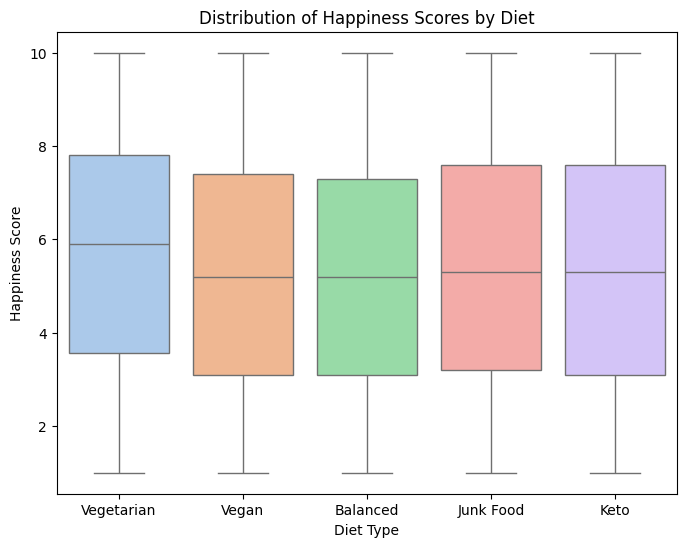

In [3]:
# Boxplot of happiness scores by diet
plt.figure(figsize=(8,6))
sns.boxplot(x='Diet Type', y='Happiness Score', data=df, palette='pastel', hue='Diet Type', legend=False)
plt.title('Distribution of Happiness Scores by Diet')
plt.xlabel('Diet Type')
plt.ylabel('Happiness Score')
plt.show()

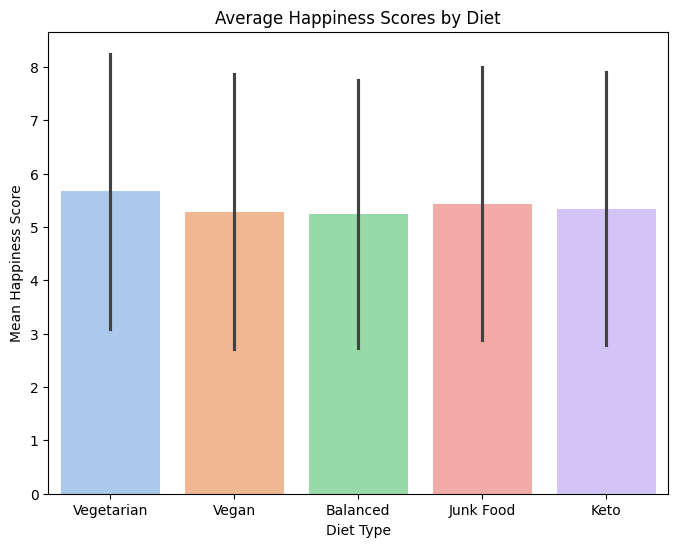

In [4]:
plt.figure(figsize=(8,6))
sns.barplot(
    x='Diet Type',
    y='Happiness Score',
    data=df,
    errorbar='sd',        # replaces ci='sd'
    hue='Diet Type',      # required when using palette
    palette='pastel',
    legend=False          # removes redundant legend
)

plt.title('Average Happiness Scores by Diet')
plt.xlabel('Diet Type')
plt.ylabel('Mean Happiness Score')
plt.show()


One-way ANOVA

In [5]:
# Conduct one-way ANOVA
f_stat, p_value = stats.f_oneway(vegan, vegetarian, junk_food, balanced, keto)

print("F-statistic:", f_stat)
print("p-value:", p_value)

# Interpret results
if p_value < 0.05:
    print("Reject H0: There is a significant difference in mean happiness scores among diet types.")
else:
    print("Fail to reject H0: No significant difference in mean happiness scores among diet types.")

F-statistic: 2.53084363729162
p-value: 0.038620163776759385
Reject H0: There is a significant difference in mean happiness scores among diet types.


Planned Contrasts

In [6]:
from scipy.stats import ttest_ind

#An independent-samples t-test was conducted to compare mean happiness scores
#between individuals following plant-based diets and those following other diets.

# --- Step 1: Create the 'plant_based' column ---
# 1 = Vegan or Vegetarian, 0 = all other diets
df['plant_based'] = df['Diet Type'].isin(['Vegan', 'Vegetarian']).astype(int)

# Split the data into two groups
plant_based = df[df['plant_based'] == 1]['Happiness Score']
non_plant_based = df[df['plant_based'] == 0]['Happiness Score']

# Run independent t-test
t_stat, p_value = ttest_ind(plant_based, non_plant_based, equal_var=False)

print("p-value:", p_value)

p-value: 0.15420816150055197


In [7]:
print("Significant difference found" if p_value < 0.05 else "No significant difference found")

No significant difference found


In [9]:
import plotly.express as px

fig = px.box(df, 
             x="Diet Type", 
             y="Happiness Score",
             color="Diet Type",          # adds colors per diet
             title="Happiness Scores by Diet",
             hover_data=['Happiness Score'])  # shows exact score on hover
fig.show()
